In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
name = '6400 neurons per layer'
activation = 'relu'
batch_size = 128
neurons_number = 6400
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 6400)              12800     
_________________________________________________________________
dense (Dense)                (None, 6400)              40966400  
_________________________________________________________________
dense_1 (Dense)              (None, 6400)              40966400  
_________________________________________________________________
dense_2 (Dense)              (None, 6400)              40966400  
_________________________________________________________________
output (Dense)               (None, 1)                 6401      
Total params: 122,918,401
Trainable params: 122,918,401
Non-trainable params: 0
_________________________________________________________________


In [4]:
X_train, Y_train = train_data(start=0, end=0.8, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 29s 453ms/step - loss: 0.1590 - mse: 0.1590 - mean_absolute_error: 0.2179 - val_loss: 8.7064e-04 - val_mse: 8.7064e-04 - val_mean_absolute_error: 0.0282
Epoch 2/20
63/63 [==============================] - 28s 453ms/step - loss: 1.6443e-05 - mse: 1.6443e-05 - mean_absolute_error: 0.0026 - val_loss: 1.0851e-04 - val_mse: 1.0851e-04 - val_mean_absolute_error: 0.0090
Epoch 3/20
63/63 [==============================] - 28s 445ms/step - loss: 8.1565e-08 - mse: 8.1565e-08 - mean_absolute_error: 1.9568e-04 - val_loss: 8.5877e-05 - val_mse: 8.5877e-05 - val_mean_absolute_error: 0.0078
Epoch 4/20
63/63 [==============================] - 28s 446ms/step - loss: 3.3700e-08 - mse: 3.3700e-08 - mean_absolute_error: 1.2646e-04 - val_loss: 7.9309e-05 - val_mse: 7.9309e-05 - val_mean_absolute_error: 0.0074
Epoch 5/20
63/63 [==============================] - 29s 453ms/step - loss: 1.6502e-08 - mse: 1.6502e-08 - mean_absolute_error: 8.7002e-05 - val_loss

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 25ms/step - loss: 2.4237e-04 - mse: 2.4237e-04 - mean_absolute_error: 0.0078


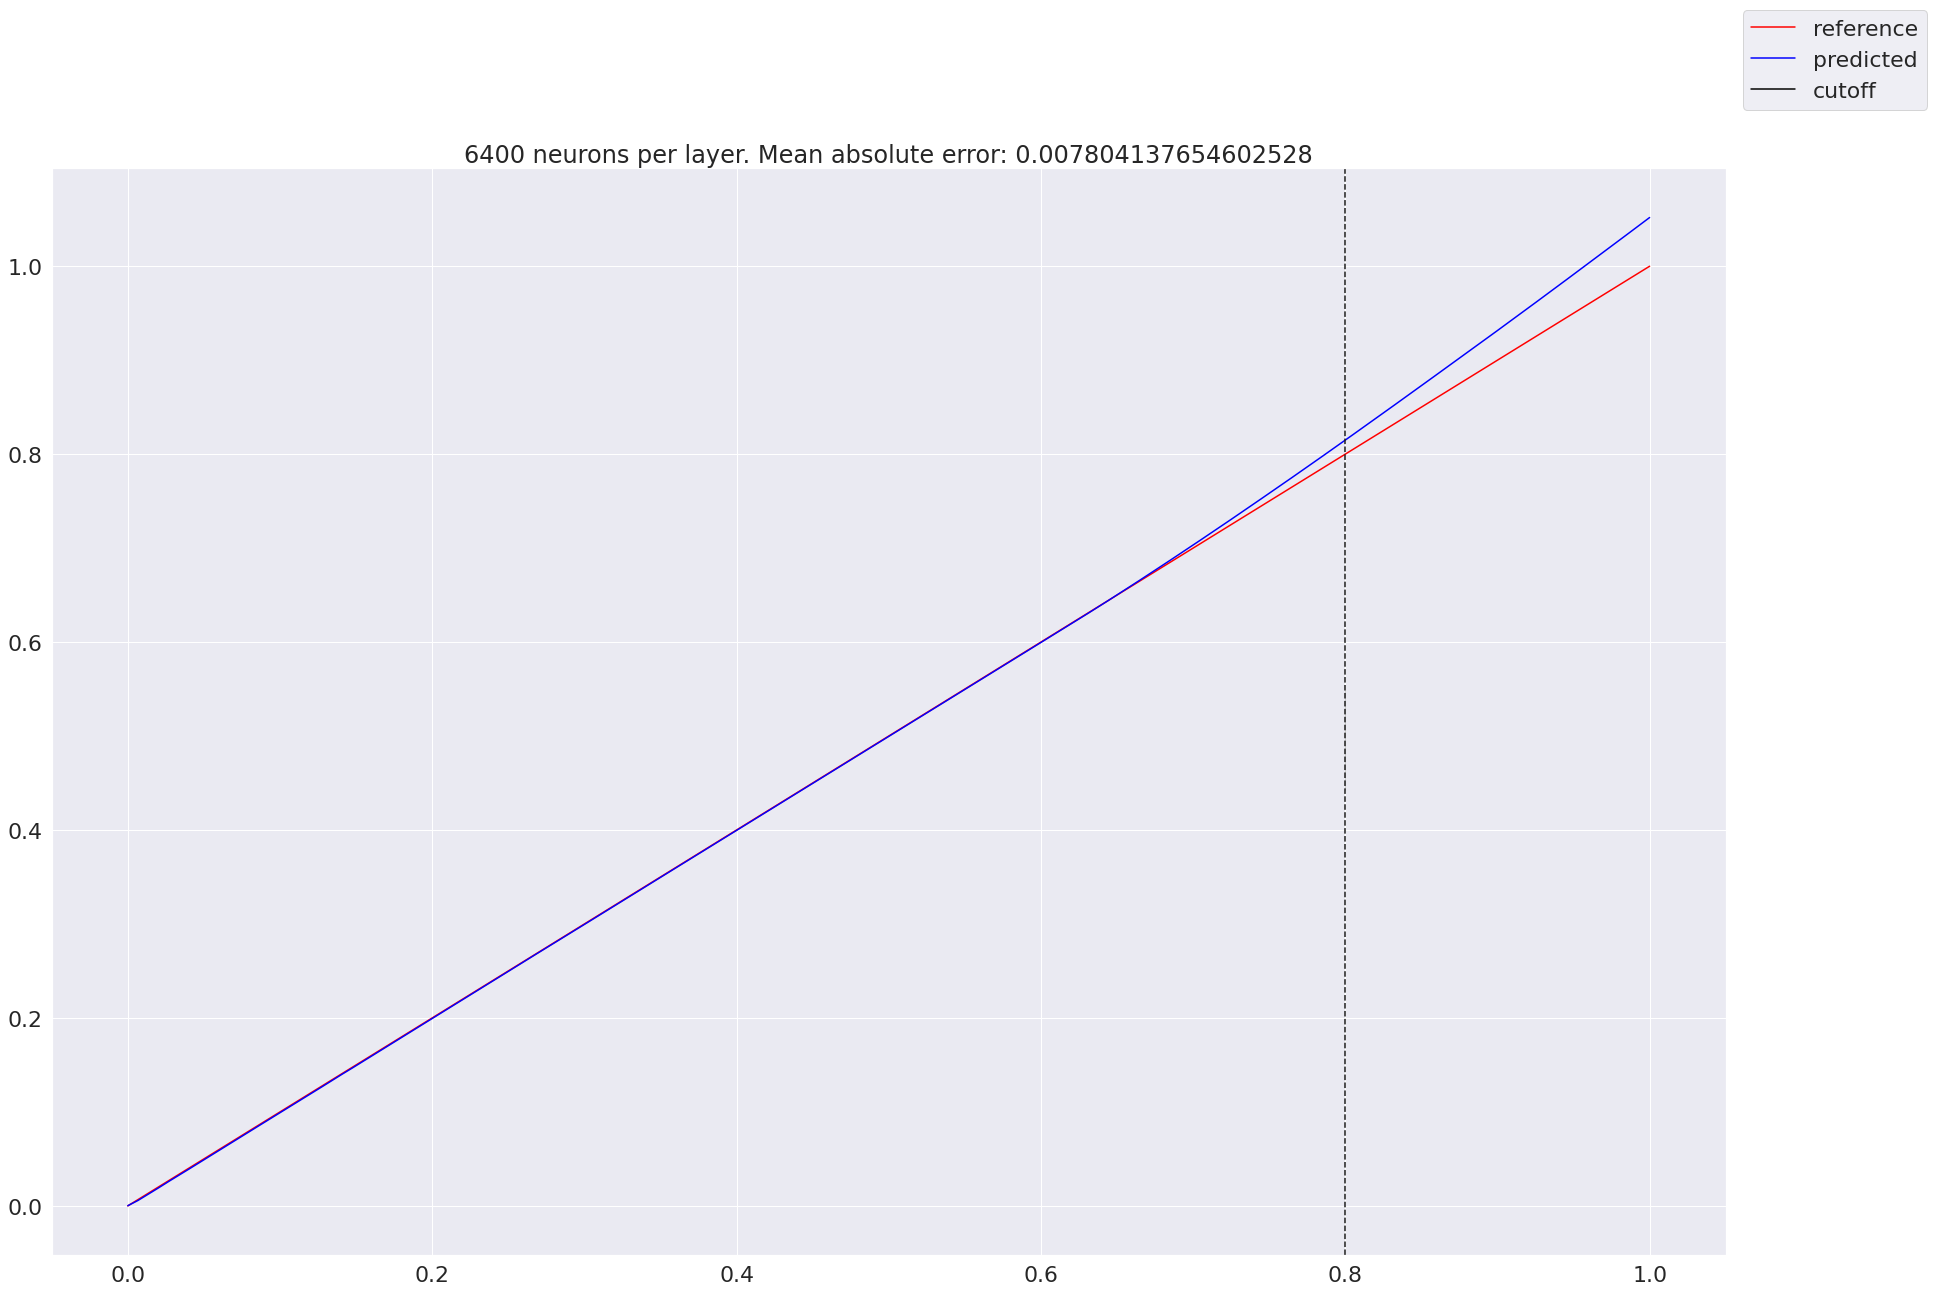

In [6]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.8)